<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Dataset</b>
* Dry Bean Dataset - https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

# Data Preprocessing & Exploration Data Analysis

In [3]:
# Membaca Dataset dari file Excel
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

## Data Overview

In [4]:
# Menampilkan lima baris pertama dari Dataset
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Menampilkan dimensi atau ukuran Dataset
df.shape

(13611, 17)

In [6]:
# Menampilkan informasi ringkas tentang struktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
# Menghitung jumlah nilai null atau missing value dalam setiap kolom
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
# Menampilkan ringkasan statistik deskriptif
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Target Info

In [9]:
# Menampilkan nilai unik yang terdapat dalam kolom 'Class'
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [10]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'Class'
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

## Data Visualization

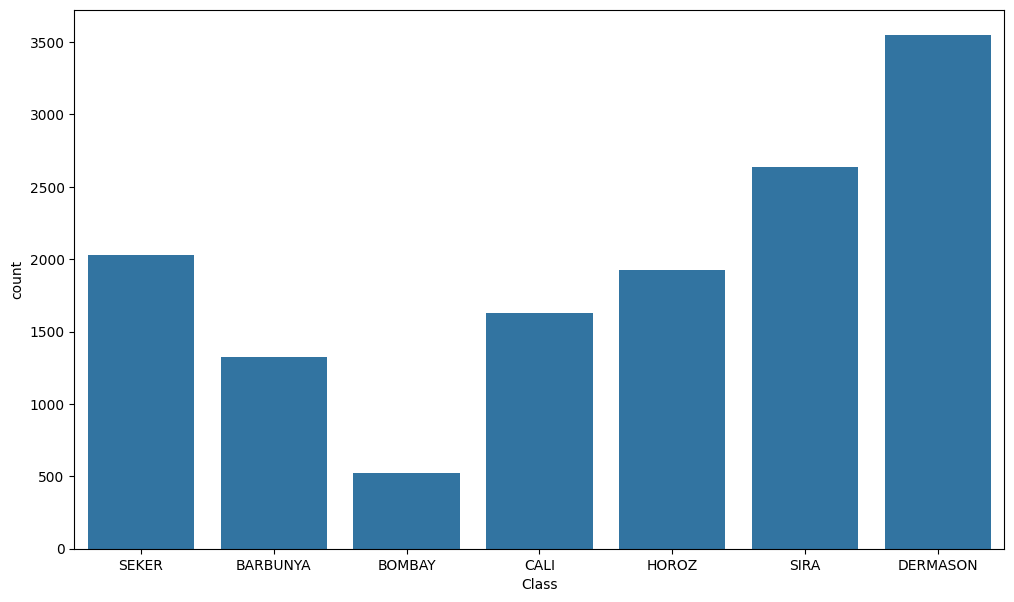

In [11]:
# Menampilkan diagram batang yang menggambarkan distribusi jumlah sampel untuk setiap kelas
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

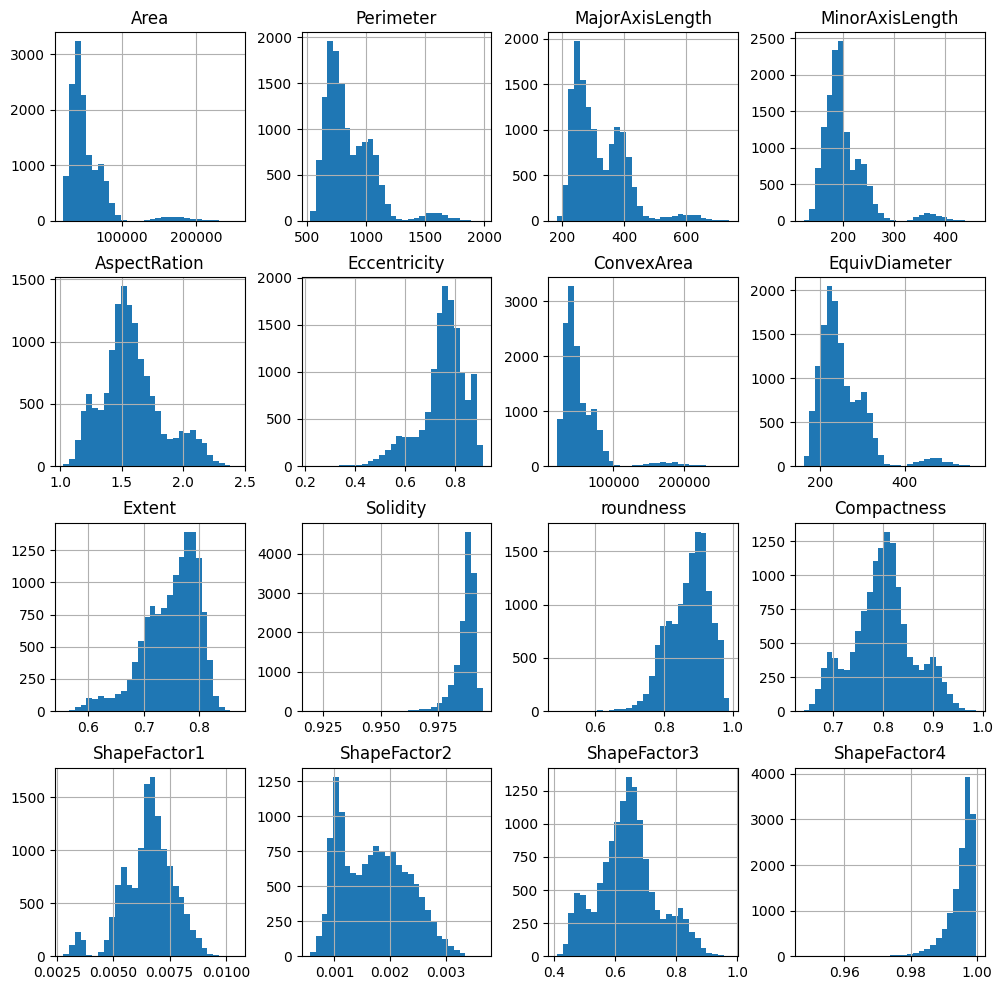

In [20]:
# Menampilkan histogram untuk setiap kolom numerik dalam Dataset
df.hist(bins=30, figsize=(12,12))
plt.show()

## Splitting Data & Standarizing Features

In [21]:
# Menggunakan LabelEncoder untuk mengubah nilai kategori dalam kolom 'Class' menjadi nilai numerik
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

In [22]:
# Membagi dataset menjadi fitur (X) dan target (y)
X = df.drop(columns='Class')  # Mengambil fitur dengan menghapus kolom 'Class' dari DataFrame
y = df['Class']  # Mengambil target dari kolom 'Class' dari DataFrame

In [23]:
# Memisahkan dataset menjadi data latih dan data uji menggunakan train_test_split
# Dengan proporsi data latih sebesar 80% dan seed (random_state) 42 untuk reproduktibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [24]:
# Standarisasi fitur menggunakan StandardScaler pada data latih dan data uji
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Ringkasan Metode

Dalam rangka meningkatkan kinerja model RandomForestClassifier (Baseline), Kami melakukan tiga pendekatan eksplorasi yang berbeda. Pertama, kami melakukan penyetelan hyperparameter menggunakan teknik GridSearchCV untuk mencari kombinasi terbaik dari beberapa parameter yang telah ditentukan sebelumnya. Kedua, kami melakukan proses seleksi fitur dengan menggunakan feature importance dari RandomForestClassifier untuk mempertimbangkan fitur-fitur yang paling berpengaruh dalam prediksi kelas. Terakhir, kami menggunakan AdaBoostClassifier untuk memperkuat model RandomForestClassifier dengan harapan mendapatkan peningkatan performa yang signifikan. Setiap pendekatan ini diharapkan memberikan kontribusi untuk meningkatkan akurasi model tanpa informasi sebelumnya tentang hasil yang akan diperoleh dari eksplorasi ini.

## Baseline Model

In [25]:
# Membuat model Random Forest Classifier dengan parameter yang telah ditentukan
forest = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=8, max_features=5, min_samples_leaf=5)

# Melatih model menggunakan data latih yang telah di-standarisasi
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=5,
                       n_estimators=10, random_state=42)

In [26]:
# Melakukan prediksi terhadap data uji yang telah di-standarisasi menggunakan model baseline RandomForest
y_pred_baseline = forest.predict(X_test_scaled)

# Menghitung akurasi dari prediksi model baseline terhadap data uji
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

In [28]:
# Mencetak nilai akurasi dari model terhadap data uji
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_baseline))

# Mencetak laporan klasifikasi yang meliputi precision, recall, dan f1-score untuk setiap kelas target
print(classification_report(y_test, y_pred_baseline, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.91737
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.85      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.94      0.92       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.93      0.95       413
        SIRA       0.86      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.92      0.92      2723



##Model Exploration (at least 3 scheme)

### Hyperparameter Tuning

Pendekatan pertama melakukan penyetelan hyperparameter pada model RandomForestClassifier menggunakan GridSearchCV. Hal ini dilakukan dengan mencari kombinasi terbaik dari beberapa hyperparameter yang telah ditentukan sebelumnya.

In [29]:
# Membuat grid parameter yang akan digunakan dalam proses penyetelan parameter (hyperparameter tuning)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 8, 10, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 3, 5, 10]
}

In [30]:
# Membuat objek GridSearchCV untuk mencari kombinasi parameter terbaik menggunakan metode Grid Search
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1)

# Melakukan pencarian parameter terbaik menggunakan data latih yang telah di-standarisasi
grid_search.fit(X_train_scaled, y_train)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
221 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=5,
                                              min_samples_leaf=5,
                                              n_estimators=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [31]:
# Mencetak informasi mengenai kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV
print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}


In [32]:
# Menggunakan model terbaik hasil dari GridSearchCV untuk melakukan prediksi terhadap data uji yang telah di-standarisasi
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)

# Menghitung akurasi dari prediksi model terbaik terhadap data uji
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

In [33]:
# Mencetak nilai akurasi setelah penyetelan hyperparameter terhadap data uji
print('Accuracy after hyperparameter tuning: %.5f' % accuracy_score(y_test, y_pred_tuned))

# Mencetak laporan klasifikasi setelah penyetelan hyperparameter yang meliputi precision, recall, dan f1-score untuk setiap kelas target
print(classification_report(y_test, y_pred_tuned, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy after hyperparameter tuning: 0.92288
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.89      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.93      0.95       413
        SIRA       0.87      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



### Feature Selection

Pendekatan kedua berfokus pada seleksi fitur menggunakan feature importance dari RandomForestClassifier. Fitur yang dianggap penting dipilih untuk melatih model RandomForestClassifier.

In [34]:
# Melatih kembali model RandomForestClassifier menggunakan data latih yang telah di-standarisasi
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=5,
                       n_estimators=10, random_state=42)

In [35]:
# Mendapatkan nilai penting (importance) dari fitur-fitur pada model RandomForestClassifier
feature_importances = forest.feature_importances_

# Menggunakan SelectFromModel untuk  fitur-fimemilihtur berdasarkan threshold median importance dari model RandomForest
selected_features = SelectFromModel(forest, threshold='median')

# Melatih SelectFromModel untuk memilih fitur-fitur pada data latih yang telah di-standarisasi
selected_features.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=8, max_features=5,
                                                 min_samples_leaf=5,
                                                 n_estimators=10,
                                                 random_state=42),
                threshold='median')

In [36]:
# Memilih fitur-fitur yang telah dipilih sebelumnya menggunakan SelectFromModel pada data latih yang telah di-standarisasi
X_train_selected = selected_features.transform(X_train_scaled)

# Memilih fitur-fitur yang telah dipilih sebelumnya menggunakan SelectFromModel pada data uji yang telah di-standarisasi
X_test_selected = selected_features.transform(X_test_scaled)

In [37]:
# Membuat model RandomForestClassifier baru dengan parameter yang sama seperti model asli
forest_selected = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=8, max_features=5, min_samples_leaf=5)

# Melatih kembali model RandomForestClassifier menggunakan subset fitur-fitur yang telah dipilih sebelumnya pada data latih yang telah di-standarisasi
forest_selected.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=5,
                       n_estimators=10, random_state=42)

In [38]:
# Melakukan prediksi terhadap data uji menggunakan model RandomForestClassifier yang telah dilatih menggunakan subset fitur-fitur yang dipilih sebelumnya
y_pred_selected = forest_selected.predict(X_test_selected)

# Menghitung nilai akurasi dari prediksi terhadap data uji
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [39]:
# Mencetak nilai akurasi setelah proses Feature Selection
print('Accuracy after Feature Selection: %.5f' % accuracy_selected)

# Mencetak laporan klasifikasi setelah Feature Selection
# Laporan mencakup precision, recall, dan f1-score untuk setiap kelas target
print(classification_report(y_test, y_pred_selected, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy after Feature Selection: 0.89093
              precision    recall  f1-score   support

    BARBUNYA       0.82      0.70      0.76       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.81      0.87      0.84       317
    DERMASON       0.89      0.92      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.95      0.93      0.94       413
        SIRA       0.85      0.86      0.85       536

    accuracy                           0.89      2723
   macro avg       0.90      0.89      0.89      2723
weighted avg       0.89      0.89      0.89      2723



### AdaBoost

Pendekatan terakhir menggunakan AdaBoostClassifier untuk meningkatkan performa model RandomForestClassifier. AdaBoost digunakan sebagai algoritma ensemble untuk menggabungkan beberapa model RandomForestClassifier.

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
# Creating the AdaBoostClassifier with the base RandomForestClassifier
adaboost = AdaBoostClassifier(estimator=forest, n_estimators=50, random_state=42)

# Training the AdaBoostClassifier using the standardized training data
adaboost.fit(X_train_scaled, y_train)


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   random_state=42)

In [49]:
# Melakukan prediksi terhadap data uji menggunakan model AdaBoostClassifier yang telah dilatih sebelumnya
y_pred_adaboost = adaboost.predict(X_test_scaled)

# Menghitung nilai akurasi dari prediksi terhadap data uji
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

In [50]:
# Mencetak nilai akurasi dari prediksi model AdaBoost terhadap data uji
print('Accuracy with AdaBoost: %.5f' % accuracy_score(y_test, y_pred_adaboost))

# Mencetak laporan klasifikasi yang mencakup precision, recall, dan f1-score untuk setiap kelas target
print(classification_report(y_test, y_pred_adaboost, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy with AdaBoost: 0.92361
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.90      0.91      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.89      0.88       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



## Evaluation

In [51]:
# Mencetak nilai akurasi untuk masing-masing metode
print(f'Accuracy for Baseline RandomForest: {accuracy_baseline:.5f}')
print(f'Accuracy after Hyperparameter Tuning: {accuracy_tuned:.5f}')
print(f'Accuracy after Feature Selection: {accuracy_selected:.5f}')
print(f'Accuracy with AdaBoost: {accuracy_adaboost:.5f}')

# Mencetak laporan klasifikasi untuk setiap metode
print("\nClassification Report for Baseline RandomForest:")
print(classification_report(y_test, y_pred_baseline))

print("\nClassification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_tuned))

print("\nClassification Report after Feature Selection:")
print(classification_report(y_test, y_pred_selected))

print("\nClassification Report with AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))

Accuracy for Baseline RandomForest: 0.91737
Accuracy after Hyperparameter Tuning: 0.92288
Accuracy after Feature Selection: 0.89093
Accuracy with AdaBoost: 0.92361

Classification Report for Baseline RandomForest:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       261
           1       1.00      1.00      1.00       117
           2       0.89      0.94      0.92       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.97      0.93      0.95       413
           6       0.86      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.92      0.92      2723


Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       261
           1       1.00     

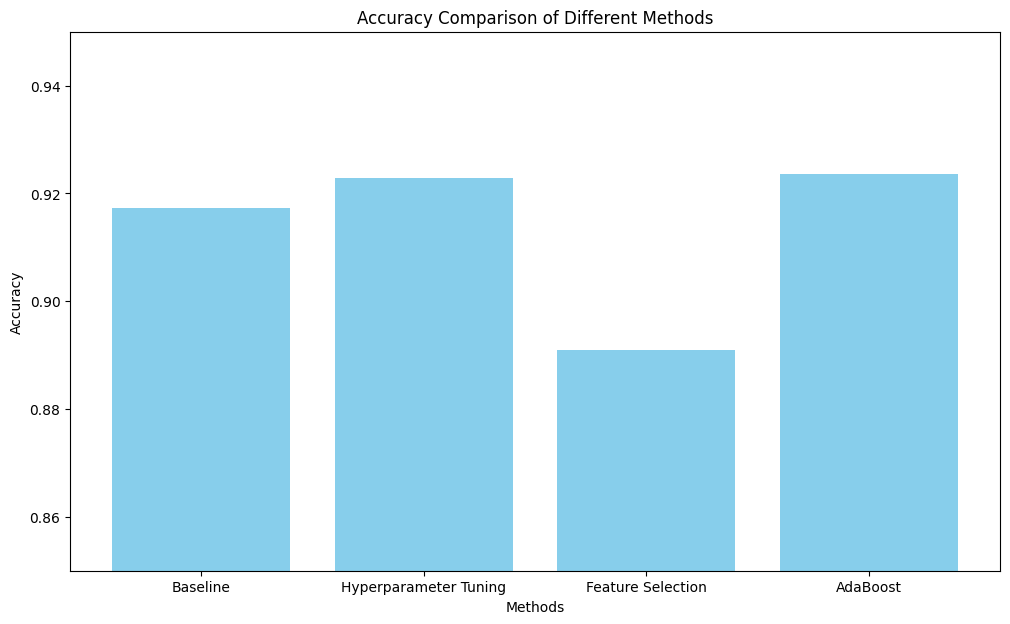

In [52]:
# Visualisasi perbandingan akurasi antara metode-metode yang digunakan
accuracies = [accuracy_baseline, accuracy_tuned, accuracy_selected, accuracy_adaboost]
methods = ['Baseline', 'Hyperparameter Tuning', 'Feature Selection', 'AdaBoost']

plt.figure(figsize=(12, 7))
plt.bar(methods, accuracies, color='skyblue')
plt.title('Accuracy Comparison of Different Methods')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim(0.85, 0.95)
plt.show()

# Hasil dan Analisis

Hasil evaluasi berbagai metode pada model RandomForestClassifier menunjukkan perbedaan yang menarik dalam performa. Model baseline RandomForest memiliki akurasi sebesar 0.91737 dengan presisi dan recall yang baik untuk sebagian besar kelas, meskipun terdapat beberapa kelas dengan recall yang lebih rendah. Setelah dilakukan penyetelan hyperparameter menggunakan GridSearchCV, terjadi peningkatan akurasi menjadi 0.92288. Meskipun terjadi peningkatan yang sedikit, hasilnya menunjukkan perbaikan pada presisi dan recall untuk beberapa kelas. Namun, hasil dari seleksi fitur menunjukkan penurunan dalam akurasi menjadi 0.89093, menandakan bahwa fitur yang diabaikan oleh seleksi fitur mungkin memiliki kontribusi penting dalam memprediksi beberapa kelas. Penggunaan AdaBoost memberikan performa yang setara dengan penyetelan hyperparameter, menunjukkan bahwa dalam kasus ini, AdaBoost tidak memberikan peningkatan yang signifikan pada model RandomForestClassifier. Evaluasi ini menggambarkan bahwa tidak semua pendekatan memberikan peningkatan yang signifikan dalam performa model, dan perubahan pada model perlu dievaluasi secara hati-hati untuk memahami dampaknya secara menyeluruh.







# Kesimpulan
Dry Bean Dataset adalah kumpulan data yang berisi gambar dan fitur dari 13.611 biji kacang kering dari 7 varietas yang berbeda. Dataset ini memiliki 16 fitur, termasuk 12 fitur dimensi dan 4 fitur bentuk. Fitur dimensi meliputi luas, keliling, panjang sumbu utama, panjang sumbu minor, diameter setara, dan lain-lain. Fitur bentuk meliputi rasio aspek, eksentrisitas, soliditas, dan lain-lain. Dataset ini tidak memiliki nilai yang hilang.

Dalam analisis ini, model baseline RandomForestClassifier digunakan untuk klasifikasi. Dalam upaya meningkatkan akurasi model, dilakukan tiga pendekatan eksplorasi: penyetelan hyperparameter menggunakan GridSearchCV, seleksi fitur menggunakan feature importance dari RandomForestClassifier, dan penggunaan AdaBoostClassifier untuk memperkuat model.

Hasil evaluasi menunjukkan bahwa:

- Model baseline memiliki akurasi sebesar 0.91737.
- Setelah penyetelan hyperparameter, akurasi meningkat menjadi 0.92288.
- Seleksi fitur menghasilkan penurunan akurasi menjadi 0.89093, menunjukkan bahwa fitur yang diabaikan memiliki kontribusi penting dalam klasifikasi.
- Penggunaan AdaBoost menghasilkan akurasi 0.92214, setara dengan model setelah penyetelan hyperparameter.

Dari hasil ini, dapat disimpulkan bahwa penyetelan hyperparameter dan penggunaan AdaBoost memberikan peningkatan akurasi yang signifikan dibandingkan dengan model baseline. Namun, seleksi fitur tidak selalu menghasilkan peningkatan performa dan perlu dipertimbangkan dengan hati-hati dalam proses analisis.